In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('data/data.csv')
df = df.fillna(0)

df = pd.read_csv('data.csv')
df = df.fillna(0)

In [144]:
X = df.drop(columns=['Unnamed: 6','SUS', 'Purchase']).to_numpy() # data
y = df["Purchase"].to_numpy() # labels

# Setting variables
X = df.drop(columns=['Unnamed: 6','SUS', 'Purchase']).to_numpy() # data
y = df[["Purchase"]].to_numpy() # labels


In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [146]:
# Import model's frameworks
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [147]:
# Define each model/classifer

lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [148]:
# Train each model/classifier

lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [149]:
# Test each model/classifier

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        17
           1       0.80      0.92      0.86        13

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.92      0.85      0.88        13

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.90        30
weighted avg       0.90      0.90      0.90        30

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.92      0.92      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

              preci

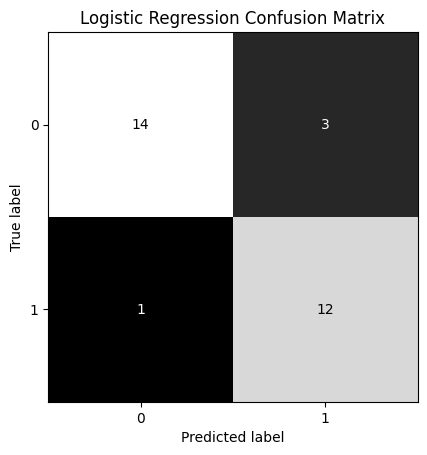

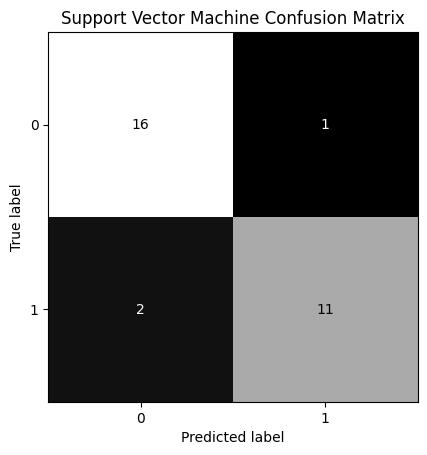

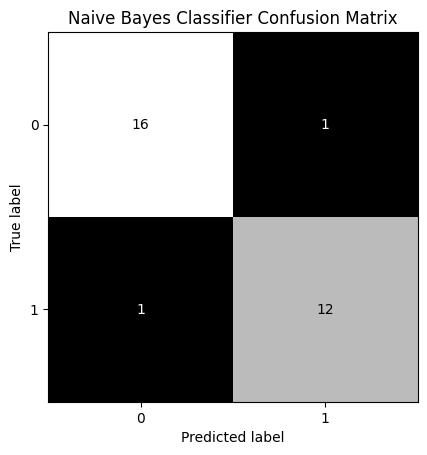

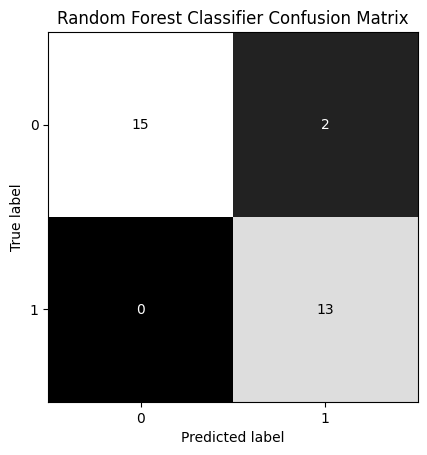

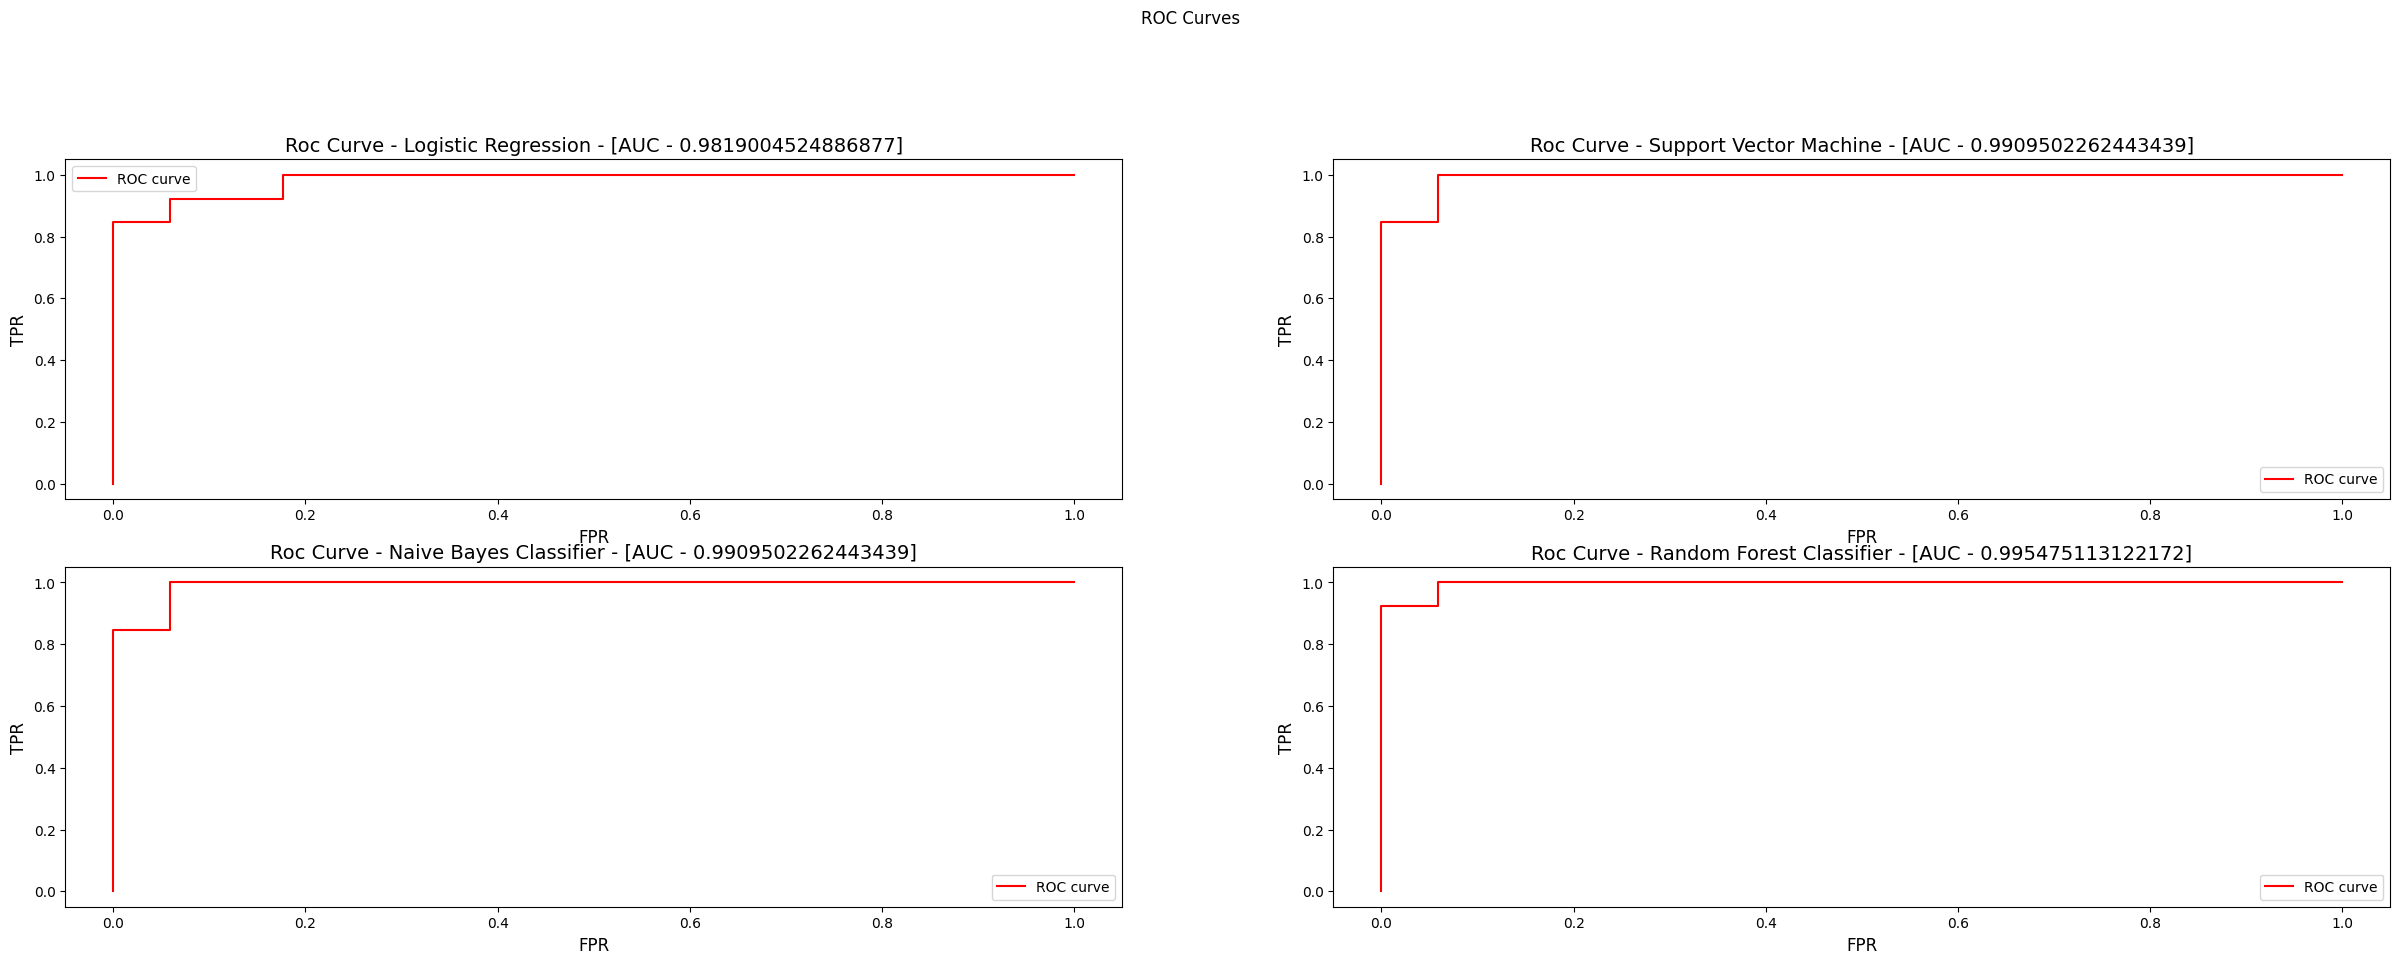

In [150]:
# Model/classifier evaluation report with ROC and Confusion matricies

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

# Creating vectors of model names, label prediction data, and prediction probability
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

# Iterating though each model to generate confusion matrices
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

# Iterating though each model to generate ROC curves
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()